# Fiona O'Riordan 29 November 2019

## Module 52446 2019 Fundamentals of Data Analysis  

## Assignment: Tips


## 1. Introduction

This repository is my submission for Project 2019, Module 52446: Fundamentals of Data Analysis. The project is an exploration and analysis of the python seaborn tips data set using the python packages seaborn and jupyter notebook.

The project begins with background information on the tips dataset. An Exploratory Data Analysis section will describe the tips data using descriptive statistics and plots. The next section **subtitle** will focus on wether there is a relationship between the total bill and tip amount within the data set. Then, an analysis of relationship between the variables within the dataset will performed. A summary of the key findings will be listed. Lastly, appropriate references used throughout will be documented.

Key Questions: 
1. What the busiest times of the restaurant?
2. When are you most likely to earn the best tips?
3. What factors influence tips?
4. What is the most common tip?

## 2. An Exploratory Data Analysis of the Tips Dataset.

### 2.1 Load the data

First lets load the seaborn tips database.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Taken from : https://stackoverflow.com/a/47955814 
# Adjusting the figure size of seaborn plots in this notebook
sns.set(rc={'figure.figsize':(10,7)})
df = sns.load_dataset('tips')


### 2.2 Explore the data

Now we can begin to explore the data. We can see from the info function that we have 244 entries and 7 columns in the dataset. The first two columns, 'total_bill' and 'tip' are datatype float64. Columns 'sex', 'smoker', 'day' and 'time' are all category columns. The last column 'size' has datatype int64.  All of the columns are non-null. The Index ranges from 0 to 243.

In [2]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### 2.2 A quick look

The function df.head() shows us the fist 5 entries in the database. 

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Similarly, the function df.tail() shows us the last 5 entries in the database.

In [4]:
df.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### 2.3 A Statistical Overview

The describe function gives us a statistical overview of the database for each of the numerical columns. We can see that we have 244 entries with no missing values. 

This function shows the average bill is almost $20 ($19.785943) with a standard deviation of 8.902412, the average tip is almost $3 ($2.998279) with a standard deviation of 1.38 (1.383638) and the average party size is 2.56 ($2.569672) with a standard deviation of 0.951100. The average number of diners per party are 2.56 (2.569672).
For each of the three numerical variables/attributes the min (the minimum value of the variable), max (the maximum value of the variable) and the percentiles 25%, 50% and 75% ( the nth percentile is the lowest value that is greater than n% of the values in a particular attribute) are calucated and shown below:

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### A Statistical Overview by Gender
We can also generate a statistical overview for the numerical attributes by gender:

In [6]:
(df.loc[df.loc[:,'sex']=='Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


In [7]:
(df.loc[df.loc[:,'sex']=='Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


## Is it a man's world ?

We can see from the above tables that total number that more males (157) paid the bill than females(87). Men paid on average a higher tip (3.089618) than women (2.833448). However, men also paid on average higher bills $20.744076 versus an average bill of 18.056897 paid by women. We'll come back this later when we look at the influence of gender & smoker status on tips.

# When was the restaurant busiest?

### Lunchtime Thursday: 
The busiest day for lunch was Thursday with 61 tables served and 150 diners. In comparision, Friday was a quiet day for lunch with only 7 tables servered and 14 diners. At the weekend, either no customers appeared for lunch, lunch was not served or no data was collected. 
### Dinnertime Weekend: 
The Thursday and Friday were very quite days for dinner with only 1 table, 2 diners and 12 tabels, 26 diners respectively.  In comparision the weekend was very busy for dinner with 87 tables, 219 diners on Saturday evening and 76 tables, 216 diners on Sunday evening.

### The Busiest Time:
The restaurant was most busy then on Saturday dinner time  with 219 diners at 87 tables and was followed closeby by Sunday evening with 216 diners at 76 tables.

### The Busiest Day:
The busiest day to work is a Saturday followed by Sunday. 

### The Quietest Day: 
There were only 19 tables with just 40 customers served in total served on Friday. 

Figure "Number of Customers by Day and by Time" and its underlying data summary visualise this information:

 

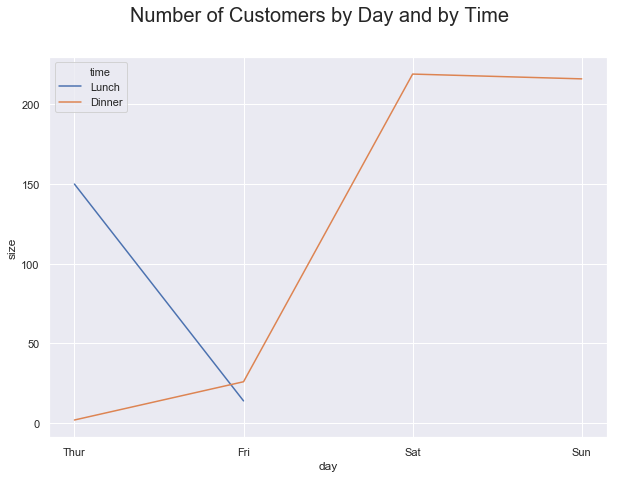

,day,time,size
0,Thur,Lunch,150
1,Thur,Dinner,2
2,Fri,Lunch,14
3,Fri,Dinner,26
4,Sat,Dinner,219
5,Sun,Dinner,216


In [92]:
# #create dataframe grouping by day & time, sum of the party size, reset the index
df_grp1 = df.groupby(['day', 'time'])['size'].sum().reset_index()

# create a figure & plot.
fig = plt.figure()
# create a seaborn line plot ax of dataframe df_grp1 
#with xaxis = day, y axis = size, hue = 'time'
ax = sns.lineplot(x='day', y='size', hue = "time", data=df_grp1)
#Adding a title at the figure level
fig.suptitle("Number of Customers by Day and by Time", fontsize = 20)
# display the plot
plt.show()
# display the data in df_grp1
df_grp1

## Are the busiest days the best days for tips?

Yes, the busiest days are the best days for tips (Sum of Tips & Sum of Customers by Day) and in parallel  the busiest days generate the largest revenue (Sum of Tips & Sum of Bills by Day and tips appear to track bills. Figure 'Sum of Tips & Sum of Bills by Day' demonstrates this:

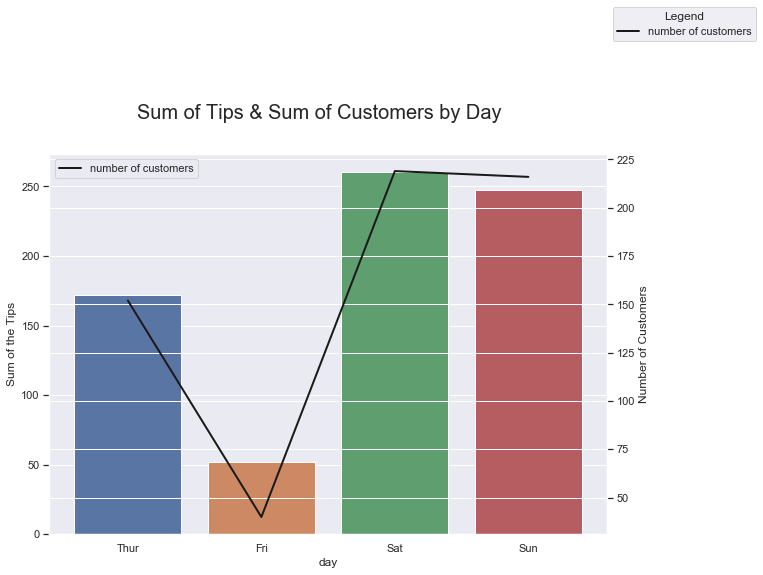

    day     tip
0  Thur  171.83
1   Fri   51.96
2   Sat  260.40
3   Sun  247.39
    day  size
0  Thur   152
1   Fri    40
2   Sat   219
3   Sun   216


In [117]:
#Adapted from : https://stackoverflow.com/a/56881800
#create groupby dataframe grouping by day & sum of the tips, reset the index.
df_grp2 = df.groupby(['day'])['tip'].sum().reset_index()

#create groupby dataframe grouping by day & size of the tips, reset the index but not time
# in order to avoid x multiple points for Thursday & Friday
df_grp4 = df.groupby(['day'])['size'].sum().reset_index()

#create a figure
fig = plt.figure()

#create a bar plot for df_grp2 .i.e. plot sum of the tips on y axis 2 by day
# Create barplot with the sum of the tips by day.
axa = sns.barplot(x='day', y='tip', 
                  #ci=None, estimator=sum,
                  data=df_grp2 
                  )
#  set the y label for axa plot
axa.set(ylabel='Sum of the Tips')
# Adapted from : https://stackoverflow.com/a/47592107
#df_grp2 and df_grp3 plots share the same x axis but different y axis.
axb = axa.twinx()
#create a line plot for df_gp1 .i.e. plot sum of the tips on y axis 1 by day
axb = sns.lineplot(x = "day", y = "size", color="k", linewidth=2, 
                   label = 'number of customers', 
                   #ci=None, estimator=sum,
                   data = df_grp4)

axb.set(ylabel='Number of Customers')
# create a twin plot of ax1 and called it ax2

#if you want to not aggregate the data, then use 


#Adapted from : https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo
#Adding a legend at the figure level
fig.legend(loc='upper left', bbox_to_anchor=(1,1.4), 
           bbox_transform=axa.transAxes, title='Legend')
#Add a figure title & adjust font size 
fig.suptitle("Sum of Tips & Sum of Customers by Day", fontsize = 20)
 

#tidy up the display
plt.show()
 
#TO DO ****************************
# Create one output to show df_grp2 & df_grp4
# ********************************************
print(df_grp2)
print(df_grp4)


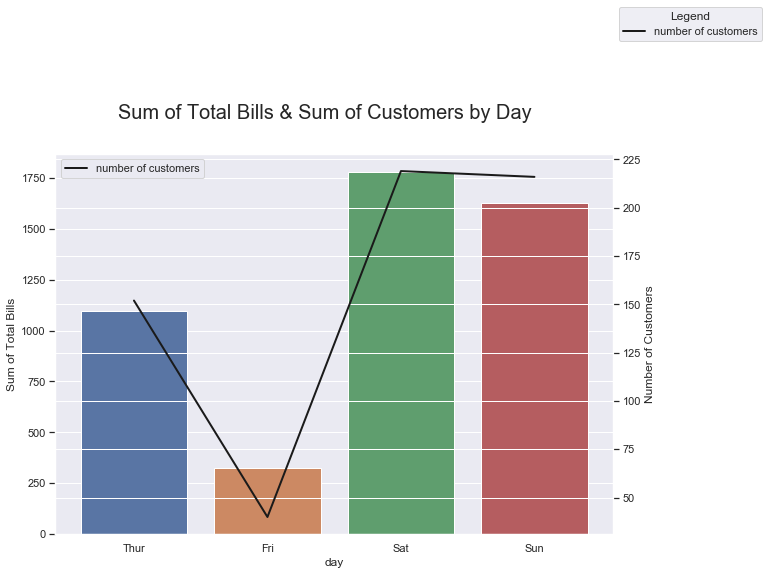

    day  total_bill
0  Thur     1096.33
1   Fri      325.88
2   Sat     1778.40
3   Sun     1627.16
    day  size
0  Thur   152
1   Fri    40
2   Sat   219
3   Sun   216


In [124]:
df_3 = df.groupby(['day'])['total_bill'].sum().reset_index()

#create a figure
fig2 = plt.figure()

#create a bar plot for df_grp2 .i.e. plot sum of the tips on y axis 2 by day
# Create barplot with the sum of the tips by day.
axa = sns.barplot(x='day', y='total_bill', 
                  #ci=None, estimator=sum,
                  data=df_3 
                  )
#  set the y label for axa plot
axa.set(ylabel='Sum of Total Bills')
# Adapted from : https://stackoverflow.com/a/47592107
#df_grp2 and df_grp3 plots share the same x axis but different y axis.
axb = axa.twinx()
#create a line plot for df_gp1 .i.e. plot sum of the tips on y axis 1 by day
axb = sns.lineplot(x = "day", y = "size", color="k", linewidth=2, 
                   label = 'number of customers', 
                   #ci=None, estimator=sum,
                   data = df_grp4)

axb.set(ylabel='Number of Customers')
# create a twin plot of ax1 and called it ax2

#if you want to not aggregate the data, then use 


#Adapted from : https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo
#Adding a legend at the figure level
fig2.legend(loc='upper left', bbox_to_anchor=(1,1.4), 
           bbox_transform=axa.transAxes, title='Legend')
#Add a figure title & adjust font size 
fig2.suptitle("Sum of Total Bills & Sum of Customers by Day", fontsize = 20)
 

#tidy up the display
plt.show()
 
#TO DO ****************************
# Create one output to show df_grp2 & df_grp4
# ********************************************
print(df_3)
print(df_grp4)

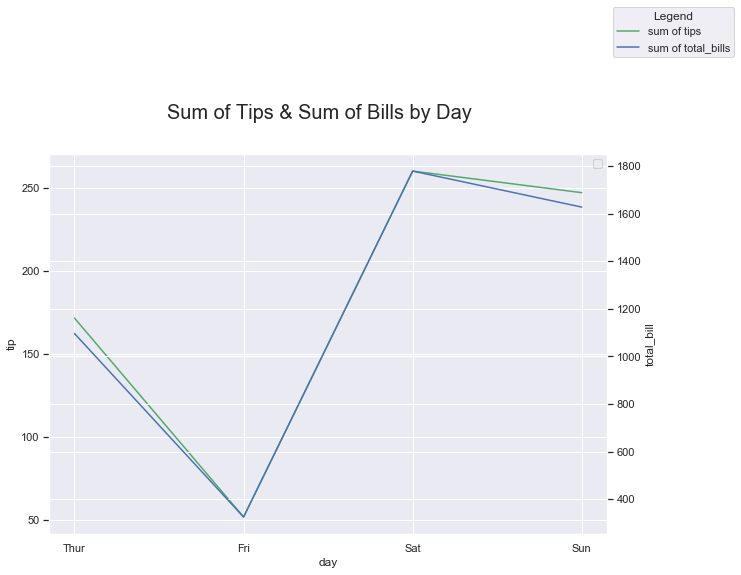

In [121]:
# create another data frame to sum bill by day
df_3 = df.groupby(['day'])['total_bill'].sum().reset_index()

#create a figure
fig = plt.figure()
# Adapted from : https://stackoverflow.com/a/47592107
#create a line plot for df_2 .i.e. plot sum of the tips on y axis 1 by day
ax1 = sns.lineplot(x = "day", y = "tip", color="g", label = 'sum of tips', data = df_2)
# create a twin plot of ax1 and called it ax2
ax2 = ax1.twinx()
#create a line plot for df_3 .i.e. plot sum of the total_bills on y axis 2 by day
#df_2 and df_3 plots share the same x axis but different y axis.
ax2 = sns.lineplot(x = "day" , y = "total_bill", color="b", label = 'sum of total_bills', data = df_3)

# Adapted from : https://stackoverflow.com/a/56272576
# Adding these lines of code so that legend is only visible at fig level. 
# Otherwise you end up with ax1 legend appearing but not ax2 legend at the ax level
ax1.legend('')
ax2.legend('')

#Adapted from : https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo
#Adding a legend at the figure level
fig.legend(loc='upper left', bbox_to_anchor=(1,1.4), 
           bbox_transform=ax1.transAxes, title='Legend')
#Add a figure title & adjust font size 
fig.suptitle("Sum of Tips & Sum of Bills by Day", fontsize = 20)

#tidy up the display
plt.show()




## TIPS



Most of the tips were generated by tables of 2. 

In [ ]:
dfsum = df.groupby('size').sum()
dfsum

But we know that most of the tables were of size 2. So lets look at the mean by table size:

In [ ]:
dfmean = df.groupby('size').mean()
dfmean

The tip average is greatest for party sizes of 6. The mean tip increases as the size of the party increases and the bill.

## Size matters:

We can apply a simple linear regression line to the data to see this relationship between tips and party size.

In [ ]:
ax = sns.regplot(x="size", y="tip", data=df)

## The Size of the Bill matters too!


We can also plot the relationship between total_bill and tip and we can see as the total_bill increases the tip also tends to increase.

In [ ]:

ax1 = sns.set(color_codes=True)

ax1 = sns.regplot(x="total_bill", y="tip", data=df)

# Adding a title
ax1.figure.suptitle("Tip by Bill Scatter & Regression Line Plot", fontsize = 24)

plt.show()


## Are smokers better tippers?

We can include the variable smoker also and see how that might influence the relationship between total_bill and tip. 

The below plot "Tip by Bill with Smoker variable included" shows how bill payers in smoking parties are more responsive in their tipping to increases in the bill (the shaded around the regression line is greater for smoker = yes ). As the bill_total changes the bill payer in non-mokers  are more likely to adjust their tip accordingly than the bill_payer in smoking parties.

In [ ]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df)

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
g.fig.subplots_adjust(top=0.9)
# Adding a title
g.fig.suptitle("Tip by Bill with Smoker variable included", fontsize = 20)
plt.show()

## Does gender influence the tip?

We can also see if the bill payer's gender influences the tip. 

The below scatter plot withe regression line "Tip by Bill with Gender" variable included appears the relationship between tip and total_bill for both sexes is quite similar since regression lines below are quite similar. 


In [ ]:
g2 = sns.lmplot(x="total_bill", y="tip",hue="sex", data=df)
#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
g2.fig.subplots_adjust(top=0.9)

# Adding a title
g2.fig.suptitle("Tip by Bill with Gender variable included", fontsize = 20)
plt.show()

## The influence of sex & smoker on tips!

When we include both gender and smoker variables we can clearly see that non smokers by comparision to somkers are more influenced by bill_total when tipping and again there is little to distinguish between male & female non smokers.

In [ ]:
g3 = sns.lmplot(x="total_bill", y="tip", col = 'smoker', row = 'sex', data=df)

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle("Tip by Bill with Gender & Smoker variable included", fontsize = 20)
plt.show()


## Percentage Tips paint a different picture.

So far, we have looked compared tip amount (tip) with bill amount (total_bill) and how the variables sex and smoker influence that relationship. According to Wanderlustingk.com (2018) tips in the US are based on percentage of the total bill with 15% a general standard, but 18-25% of the total bill an acceptable rule to use.

So it would be useful now to take another look at these relationships but replace tip with tip as a percentage of bill_total.

### Smokers can get a little meaner.

First we create a new column in the dataframe called tip_pct. This new column is simply tips expressed as a percentage of the total_bill for each observation.

In [ ]:

#create a column to calcuate tip%
df['tip_pct'] = 100 * df['tip'] / df['total_bill'] 

Then we can create figure "Tip Percentage by Bill with Gender & Smoker included". The below plots show how the bill payer in smokering parties tend to downward adjust their tip percentage as the bill amount increases. While the bill payers in smoking parties also tend to downwardly adjust their percentage tip when as the bill amount increases, they tend to do so to a lesser degree. 

Non Smoking parties with a male bill payer tend to use a more consistent percentage tip.

In [ ]:


# create a seaborn lmplot 
g4 = sns.lmplot(x="total_bill", y="tip_pct", col = 'smoker', row = 'sex', data=df)

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
g4.fig.subplots_adjust(top=0.9)
g4.fig.suptitle("Tip Percentage by Bill with Gender & Smoker included", fontsize = 20)
plt.show()

## Caution:

Female smokers pay on average the highest percentage.

In [ ]:

sns.barplot(x="sex",y= "tip_pct", hue="smoker", data=df )

But male bill payers tend to pay for bigger bills and male bill payers in a smoking party even more so:

In [ ]:

sns.barplot(x="sex",y= "total_bill", hue="smoker", data=df )


Males on average pay a bigger tip but non smoking males tend to the biggest tip on average.

In [ ]:
sns.barplot(x="sex",y= "tip", hue="smoker", data=df )


In [ ]:
#create a column to calcuate tip generated per customer served
df['tip_per_cust'] =  df['tip'] / df['size'] 
df['tip_per_cust'] 

sns.barplot(x="size",y= "tip_per_cust",  data=df )

# What was the most frequent party size?

## Two's Company
Overall, by far the most frequent party size was 2 at both lunch time and dinner . The next most popular party size was 3 and then 4. The remaining party size 1, 5 and 6 were relatively infrequent. See figure "Party Size": 

In [ ]:
#Creating a figure ax using seaborn category plot function 
ax = sns.catplot(x="size", kind="count",
            palette="pastel", edgecolor=".6", 
            data=df);

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
ax.fig.subplots_adjust(top=0.8)
# Adding a figure title with fontsize 20
ax.fig.suptitle("Overall Party Size", fontsize = 20)

The most frequent party size was 2 at both lunch time and dinner . The next most popular party size was 3 and then 4. The remaining party size 1, 5 and 6 were relatively infrequent. See figure "Party Size at Lunch & Dinner":

In [ ]:

#Creating a figure ax using seaborn category plot function 
ax = sns.catplot(x="size", kind="count",
            palette="pastel", edgecolor=".6", col = "time",
            data=df);

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
ax.fig.subplots_adjust(top=0.8)
# Adding a figure title with fontsize 20
ax.fig.suptitle("Party Size at Lunch & Dinner", fontsize = 20)




In addition, regardless of the day & time, the most popular table/party size was 2 as figure 'Party size for each Day & Time' shows:

In [ ]:

ax1 = sns.catplot (x="size", hue="time", kind="count",
            palette="pastel", edgecolor=".4", row = "day", height=6, aspect=2,
            data=df);

sns.set(style="whitegrid", font_scale=1.5)
#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
ax1.fig.subplots_adjust(top=0.95)

# Adding a title
ax1.fig.suptitle("Party size for each Day & Time", fontsize = 24)



In fact, as the following calulation and pie chart so succintly show, almost two thirds of the total covers were for parties of 2:

In [ ]:
# Adapted from https://stackoverflow.com/a/54087182

import pandas as pd
import matplotlib.pyplot as plt

dfsize = df.groupby('size').size()

sns.set()
dfsize.plot(# create a pie chart
            kind='pie', 
            # set the title of the pie chart
            title='Size of parties', 
            # figure size
            figsize=[8,8], 
            # with the percent listed as a fraction
            autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*dfsize.sum()))
plt.show()


So almost two thirds of the business is made up of party sizes of 2.  

## References:

Wanderlustingk.com, (2018) **Tipping in the USA** https://www.wanderlustingk.com/travel-blog/tipping-in-the-usa

Tip per person served

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="sex",
            kind="line", data=df);